In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## 1. Introduction
DBSCAN is a **density-based clustering algorithm** that groups together points that are closely packed, and marks points in low-density regions as **noise**.

It is particularly useful for:
- Clusters of **arbitrary shape** (unlike K-Means which assumes spherical clusters).
- Handling **outliers** (noise points are explicitly identified).
- Avoiding the need to specify the number of clusters `k` upfront.

## 2. Key Concepts

1. **ε (Epsilon)**: radius that defines the neighborhood of a point.
2. **MinPts**: minimum number of points required to form a dense region.
3. **Core Point**: has at least `MinPts` points within ε.
4. **Border Point**: fewer than `MinPts` in its neighborhood but lies within ε of a core point.
5. **Noise Point**: neither a core point nor a border point.


In [5]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=5)  # hyperparameters
labels = dbscan.fit_predict(X_scaled)
X_with_clusters = pd.DataFrame(X_scaled, columns=data.feature_names)
X_with_clusters["Cluster"] = labels
print(X_with_clusters["Cluster"].value_counts())
print("\nSample data with cluster labels:\n", X_with_clusters.head())

Cluster
 1    78
 0    46
-1    26
Name: count, dtype: int64

Sample data with cluster labels:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


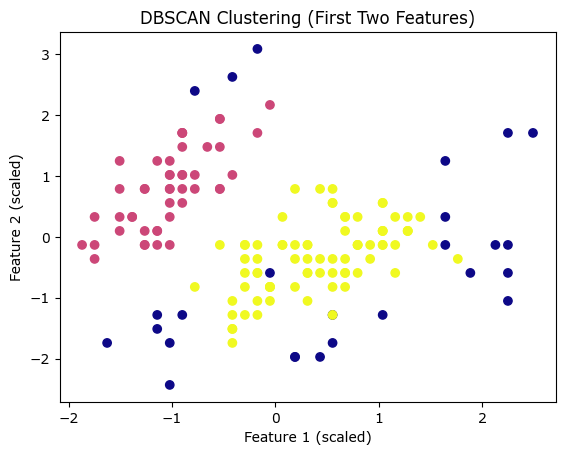

In [7]:
plt.scatter(X_with_clusters.iloc[:, 0], X_with_clusters.iloc[:, 1],
            c=X_with_clusters["Cluster"], cmap="plasma")
plt.title("DBSCAN Clustering (First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

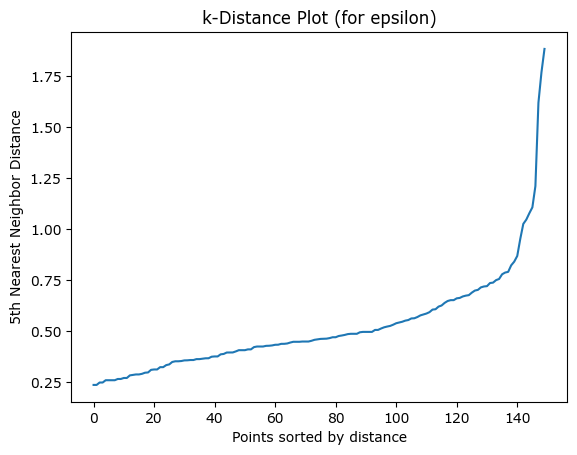

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])  # 5th nearest neighbor
plt.plot(distances)
plt.title("k-Distance Plot (for epsilon)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()